In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv("bank-full.csv", delimiter = ";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data["job"] = data["job"].astype('category').cat.codes
data["marital"] = data["marital"].astype('category').cat.codes
data["education"] = data["education"].astype('category').cat.codes
data["default"] = data["default"].astype('category').cat.codes
data["housing"] = data["housing"].astype('category').cat.codes
data["loan"] = data["loan"].astype('category').cat.codes
data["contact"] = data["contact"].astype('category').cat.codes
data["month"] = data["month"].astype('category').cat.codes
data["poutcome"] = data["poutcome"].astype('category').cat.codes
data["y"] = data["y"].astype('category').cat.codes
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [7]:
data.shape

(45211, 17)

In [8]:
x, y = data.values[:, :-1], data.values[:, -1]
x.shape

(45211, 16)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape

(31647, 16)

In [10]:
# pre prunning 
model = RandomForestClassifier(random_state = 0)
param_grid = {"n_estimators": [50, 100, 150],
             "max_depth" : [4, 8, 12, 16],
              "bootstrap" : [True, False]
             }
gs = GridSearchCV(estimator = model, param_grid = param_grid)
gs.fit(x_train, y_train)
print("best parameters:", gs.best_estimator_)
print("best score:", gs.best_score_*100)

best parameters: RandomForestClassifier(max_depth=16, n_estimators=150, random_state=0)
best score: 90.58049196544304


In [16]:

model = RandomForestClassifier(random_state = 0, n_estimators = 150, max_depth = 16)
model.fit(x_train, y_train)
print("######################################") 
print("model score before pruning") 
print("test score", model.score(x_test, y_test)*100) 
print("######################################") 

######################################
model score before pruning
test score 90.34945443821881
######################################


# Code for imbalance dataset classification is taken from [here](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

In [9]:
class_count_0, class_count_1 = data['y'].value_counts()

# Separate class
class_0 = data[data['y'] == 0]
class_1 = data[data['y'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('ratio of class 0 to class 1:', class_count_0/class_count_1)

class 0: (39922, 17)
class 1: (5289, 17)
ratio of class 0 to class 1: 7.548118737001324


# Classification using Random Undersampling

total class of 1 and 0:
 1    5289
0    5289
Name: y, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

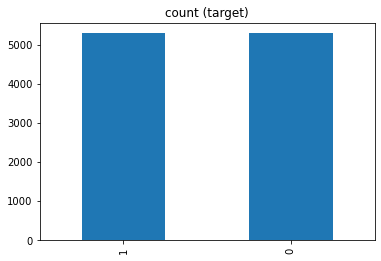

In [10]:
class_0_under = class_0.sample(class_count_1)

undersampled_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",undersampled_data['y'].value_counts())
# plot the count after under-sampeling
undersampled_data['y'].value_counts().plot(kind='bar', title='count (target)')

In [11]:
undersampled_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20324,37,4,1,2,0,2672,1,0,0,11,1,549,1,-1,0,3,0
23390,37,4,1,2,0,5065,0,0,0,27,1,23,19,-1,0,3,0
36147,30,1,0,0,0,2597,1,0,0,11,8,49,1,349,3,0,0
28606,32,1,1,1,0,-460,1,1,0,29,4,131,2,206,6,1,0
25780,50,1,0,1,0,203,1,0,1,19,9,265,1,127,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1


In [12]:
x, y = undersampled_data.iloc[:, :-1], undersampled_data.iloc[:, -1]
print(x.shape, y.shape)

(10578, 16) (10578,)


In [13]:
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train.shape

(7404, 16)

In [15]:
model = RandomForestClassifier(random_state = 0, n_estimators = 150, max_depth = 10)
model.fit(x_train, y_train)
print("######################################") 
print("model score before pruning") 
print("test score", model.score(x_test, y_test)*100) 
print("######################################") 

######################################
model score before pruning
test score 83.5538752362949
######################################


# Classification using Random Oversampling

total class of 1 and 0: 1    39922
0    39922
Name: y, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

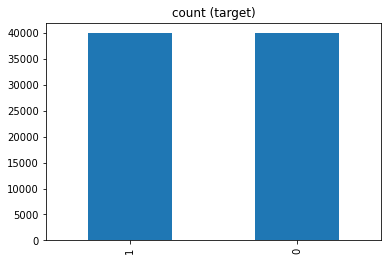

In [16]:
class_1_over = class_1.sample(class_count_0, replace=True)

oversampled_data = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",oversampled_data['y'].value_counts())
# plot the count after over-sampeling
oversampled_data['y'].value_counts().plot(kind='bar', title='count (target)')

In [17]:
oversampled_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8213,42,1,1,1,0,443,1,0,2,2,6,671,5,-1,0,3,1
43036,49,7,1,0,0,1830,1,0,0,15,3,136,1,-1,0,3,1
38694,34,7,0,1,0,89,1,0,0,15,8,1871,4,-1,0,3,1
17926,58,4,0,1,0,3161,0,0,1,30,5,542,2,-1,0,3,1
33020,42,1,1,0,0,1673,1,0,0,17,0,636,3,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,4,1,2,0,138,1,1,0,16,9,162,2,187,5,0,0
45198,37,4,1,2,0,1428,0,0,0,16,9,333,2,-1,0,3,0
45199,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [18]:
x, y = oversampled_data.iloc[:, :-1], oversampled_data.iloc[:, -1]
print(x.shape, y.shape)

(79844, 16) (79844,)


In [19]:
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[0.31168831, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.4025974 , 0.63636364, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20779221, 0.63636364, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.20779221, 0.09090909, 1.        , ..., 0.60894495, 0.04363636,
        0.33333333],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.21674312, 0.04      ,
        0.33333333]])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train.shape

(55890, 16)

In [21]:
model = RandomForestClassifier(random_state = 0, n_estimators = 150, max_depth = 10)
model.fit(x_train, y_train)
print("######################################") 
print("model score before pruning") 
print("test score", model.score(x_test, y_test)*100) 
print("######################################") 

######################################
model score before pruning
test score 87.44677298154797
######################################


# Classification using Synthetic Minority Oversampling Technique (SMOTE)


In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

x, y = data.iloc[:, :-1], data.iloc[:, -1]

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 39922, 1: 5289})
Resample dataset shape Counter({0: 39922, 1: 39922})


In [23]:
print(x_smote.shape, y_smote.shape)

(79844, 16) (79844,)


In [24]:
scaler = MinMaxScaler()
scaler.fit(x_smote)
x_scaled = scaler.transform(x_smote)
x_scaled

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.27272727, 0.        , 0.        , ..., 0.18577982, 0.02545455,
        0.66666667],
       [0.31168831, 0.36363636, 0.5       , ..., 0.09862385, 0.01090909,
        0.        ],
       [0.19480519, 0.45454545, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_smote, test_size = 0.3, random_state = 0)
x_train.shape

(55890, 16)

In [26]:
model = RandomForestClassifier(random_state = 0, n_estimators = 150, max_depth = 10)
model.fit(x_train, y_train)
print("######################################") 
print("model score before pruning") 
print("test score", model.score(x_test, y_test)*100) 
print("######################################") 

######################################
model score before pruning
test score 89.08741755030475
######################################
